In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    "./data/train",
    target_size=(128,128),
    batch_size=32,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "./data/test",
    target_size=(128,128),
    batch_size=32,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

Found 735 images belonging to 7 classes.
Found 315 images belonging to 7 classes.


In [3]:

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss') < 0.1):
            self.model.stop_training = True
    
        
        
            
callbacks = myCallback()

In [4]:
model = Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
#       tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#       tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(7, activation='softmax')
])
    
model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        36896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

In [5]:
epochs = 20

history = model.fit(x = train_generator,
                    validation_data=test_generator ,
                    batch_size=32,
                    verbose=1, 
                    epochs=epochs,
                    callbacks=[callbacks]
                   )

Epoch 1/20
23/23 [==============================] - 11s 468ms/step - loss: 1.8193 - accuracy: 0.2558 - val_loss: 1.3101 - val_accuracy: 0.4571
Epoch 2/20
23/23 [==============================] - 10s 426ms/step - loss: 1.0742 - accuracy: 0.5619 - val_loss: 0.9339 - val_accuracy: 0.6063
Epoch 3/20
23/23 [==============================] - 9s 408ms/step - loss: 0.7069 - accuracy: 0.7252 - val_loss: 0.7038 - val_accuracy: 0.7270
Epoch 4/20
23/23 [==============================] - 10s 412ms/step - loss: 0.6028 - accuracy: 0.7673 - val_loss: 0.7003 - val_accuracy: 0.7429
Epoch 5/20
23/23 [==============================] - 10s 414ms/step - loss: 0.5532 - accuracy: 0.7796 - val_loss: 0.6184 - val_accuracy: 0.7302
Epoch 6/20
23/23 [==============================] - 9s 408ms/step - loss: 0.5645 - accuracy: 0.7769 - val_loss: 0.4826 - val_accuracy: 0.8381
Epoch 7/20
23/23 [==============================] - 9s 405ms/step - loss: 0.4656 - accuracy: 0.8286 - val_loss: 0.5807 - val_accuracy: 0.7968
Ep

In [6]:
model.evaluate(test_generator)

10/10 [==============================] - 1s 93ms/step - loss: 0.3377 - accuracy: 0.8984


[0.3376905918121338, 0.8984127044677734]

In [7]:
no_epochs = len(history.history['loss'])

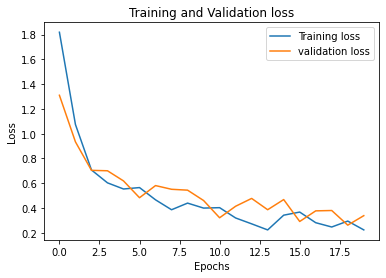

In [8]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
ep = range(no_epochs)
plt.plot(ep, loss_train, label='Training loss')
plt.plot(ep, loss_val, label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

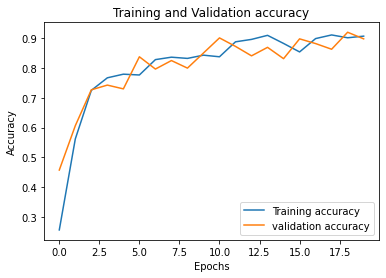

In [9]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
ep = range(no_epochs)
plt.plot(ep, loss_train,label='Training accuracy')
plt.plot(ep, loss_val, label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
def single_predict(file):
    test_image=load_img(file, target_size=(128,128))
    test_image=img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    result=model.predict(test_image)
    sorted_classes = ['10', '100', '20', '200', '2000', '50', '500']
    return sorted_classes[result.argmax()]

In [11]:
single_predict("data/single/2000rs.jpg")

1/1 [==============================] - 0s 81ms/step


'2000'

In [12]:
train_generator.class_indices

{'10': 0, '100': 1, '20': 2, '200': 3, '2000': 4, '50': 5, '500': 6}

In [13]:
# model.save_weights('optimised_CNN')

In [14]:
# import cv2
# import numpy as np


# url = input()
# cap = cv2.VideoCapture(url+"/video")

# while(True):
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     fontScale = 1
#     color = (255, 0, 0)
#     thickness = 2
    
#     ret, frame = cap.read()
#     cv2.imwrite("cv_clicked.jpg",frame)
#     res = single_predict("cv_clicked.jpg")
#     print(res)
#     cv2.putText(frame,res,(50, 50),font,fontScale,color,thickness)
#     cv2.imshow('frame',frame)
    
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()